## Hyposthesis Testing

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

Symbol                                               Name  Category1  \
0   AGTHX  American Funds The Growth Fund of America Class A  US Equity   
1   FCNTX                           Fidelity Contrafund Fund  US Equity   
2   CWMAX  American Funds Washington Mutual Investors Fun...  US Equity   
3   CWMCX  American Funds Washington Mutual Investors Fun...  US Equity   
4   CWMEX  American Funds Washington Mutual Investors Fun...  US Equity   
..    ...                                                ...        ...   
95  FDTRX                    Franklin DynaTech Fund Class R6  US Equity   
96  FDYZX               Franklin DynaTech Fund Advisor Class  US Equity   
97  BBVLX                Bridge Builder Large Cap Value Fund  US Equity   
98  PEYAX                Putnam Large Cap Value Fund Class A  US Equity   
99  TWCGX        American Century Growth Fund Investor Class  US Equity   

       Category2  Category3 Morningstar Category  Morningstar Rating  \
0   Broad market  Large cap         Large Growth                 3.0   
1   Broad market  Large cap         Large Growth                 3.0   
2   Broad market  Large cap          Large Blend                 3.0   
3   Broad market  Large cap          Large Blend                 3.0   
4   Broad market  Large cap          Large Blend                 3.0   
..           ...        ...                  ...                 ...   
95  Broad market  Large cap         Large Growth                 5.0   
96  Broad market  Large cap         Large Growth                 5.0   
97  Broad market  Large cap          Large Value                 4.0   
98  Broad market  Large cap          Large Value                 4.0   
99  Broad market  Large cap         Large Growth                 3.0   

          Market cap Current yield   Fees   Action  
0   $138,592,080,000         0.22%  0.62%  Analyze  
1   $121,762,870,000         0.00%  0.74%  Analyze  
2   $113,300,000,000         1.46%  0.63%  Analyze  
3   $113,300,000,000         0.79%  1.40%  Analyze  
4   $113,300,000,000         1.28%  0.87%  Analyze  
..               ...           ...    ...      ...  
95    $9,600,000,000         0.00%  0.51%  Analyze  
96    $9,600,000,000         0.00%  0.62%  Analyze  
97    $9,500,000,000         1.55%  0.25%  Analyze  
98    $9,393,340,000         1.23%  0.91%  Analyze  
99    $9,354,900,000         0.00%  0.98%  Analyze  

[100 rows x 11 columns]

In [18]:
mutual_fund_data["Category3"].value_counts()


Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [19]:
mutual_fund_data.groupby("Category3").mean()

Morningstar Rating
Category3                                 
Communication Services            5.000000
Health care                       5.000000
Large cap                         3.658824
Mid cap                           4.000000
Small cap                         4.000000

In [20]:
mutual_fund_data["Morningstar Rating"].value_counts(normalize = True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

In [25]:
import pandas_datareader as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = []
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1,1)
end = datetime(2020,1,1)
print((start, end, symbols))

(datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX'])


In [26]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

TypeError: string indices must be integers

In [23]:
close_data = fund_data["Adj Close"]
close_data

NameError: name 'fund_data' is not defined

In [28]:
close_data["S&P 500"] = web.get_data_yahoo("GSPC", start, end)["Adj Close"]


TypeError: string indices must be integers

In [34]:
import matplotlib.pyplot as plt
# year over year rates of change are easier to interpret
yot_return = np.log(close_data).diff(251)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05)
ax.axhline(0, ls = "--", color = "C2", linewidth = 1)
yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 1, ax = ax)

NameError: name 'close_data' is not defined

In [31]:
for year in range(1980, 2021):
    year = str(year)
    print(close_data.loc[str(year)].shape[0])

NameError: name 'close_data' is not defined

In [3]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

NameError: name 'close_data' is not defined

In [5]:
 monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

NameError: name 'monthly_close_data' is not defined

In [1]:
def t_value_1samp(data, mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n -1
    t = (x_bar-mu)/(s/np.sqrt(n))
    
    return t, df

In [4]:
sp500 = monthly_returns["S&P 500"].dropna()

NameError: name 'monthly_returns' is not defined

In [7]:
sp500.mean() * 12

NameError: name 'sp500' is not defined

In [10]:
hypothesized_rate = 0.07 / 12
hypothesized_rate

0.005833333333333334

In [11]:
t_value_1samp(data=sp500, mu=hypothesized_rate)

NameError: name 'sp500' is not defined

In [12]:
def t_value_ind_samples(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [13]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

NameError: name 'monthly_returns' is not defined

In [15]:
t_value_ind_samples(sp500, prgfx)

NameError: name 'sp500' is not defined

### T Distribution

In [17]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

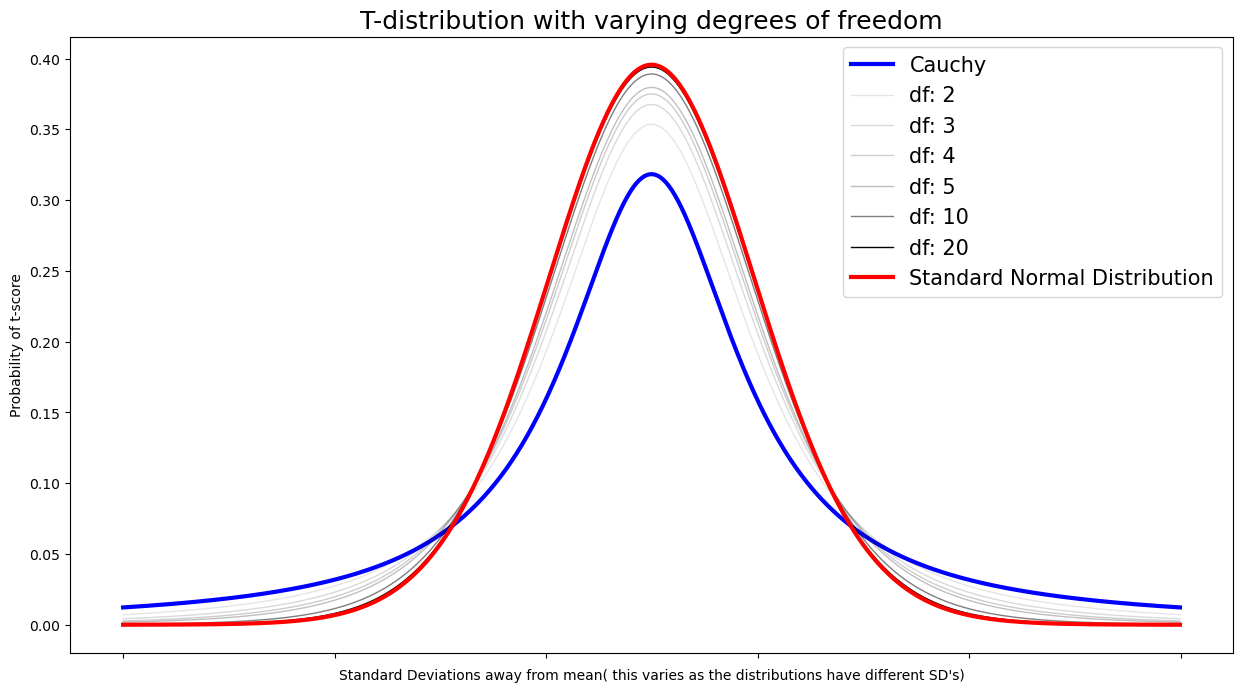

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

In [19]:
x = np.linspace(-5, 5, 1000)

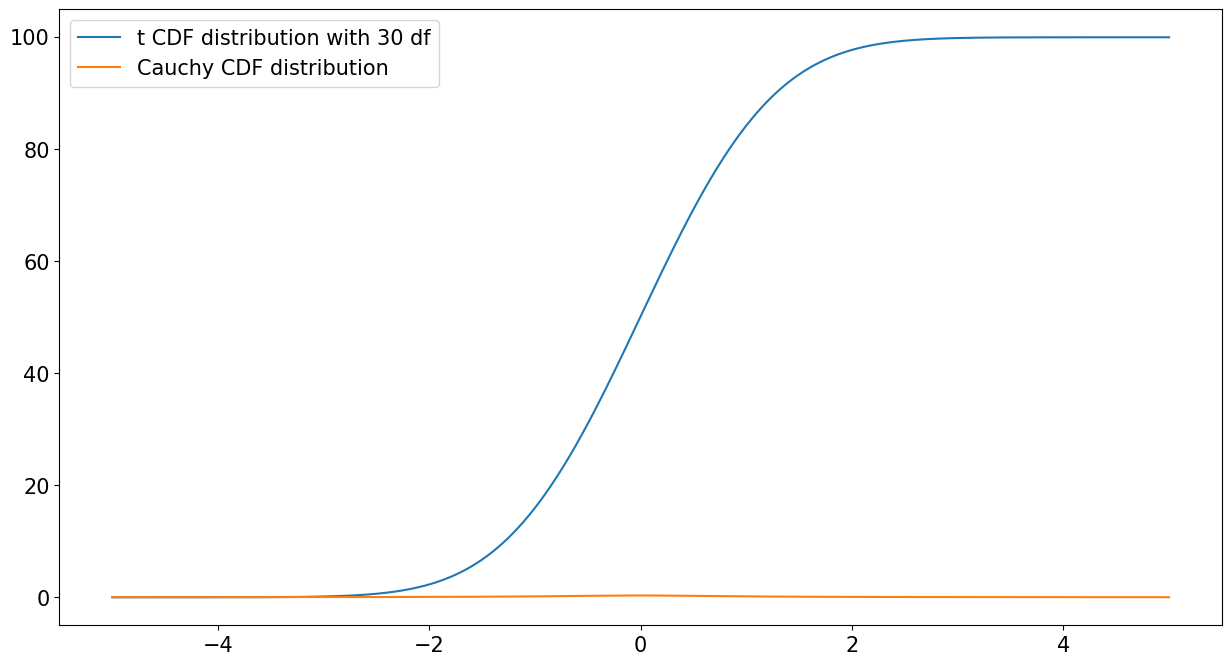

In [21]:
fig, ax = plt.subplots(figsize = (15, 8))

t_dist = t_distribution(150000, x)
cauchy = t_distribution(1,x)

f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(x)):
    f_dist[i] += f_dist[i-1]
    cauch_f_dist[i] += cauchy_f_dist[i-1]
    
ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

In [23]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

In [24]:
hypothesized_rate = 1.07 **(1/12) - 1
t_test(sp500, hypothesized_rate, 'one_sample')

NameError: name 'sp500' is not defined

### Testing for normality

In [25]:
from stats import * 
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p


ModuleNotFoundError: No module named 'stats'

In [26]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.DataReader(key, 'yahoo', start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

TypeError: string indices must be integers

### Confidence Intervals

In [27]:
def t_quintile(df, alpha):
    q = (1.0+alpha)/2
    a = stats.t.ppf(q, df)
    return a

In [31]:
def confidence_interval(data, alpha):
    n = len(data)
    df = n-1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [32]:
sp500_CI = confidence_interval(sp500, 0.05)
sp500_CI

NameError: name 'sp500' is not defined

In [33]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12

NameError: name 'sp500_CI' is not defined

In [34]:
sp500_yearly_CI

NameError: name 'sp500_yearly_CI' is not defined

In [35]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes

NameError: name 'close_data' is not defined

NameError: name 'yearly_return_CIs' is not defined

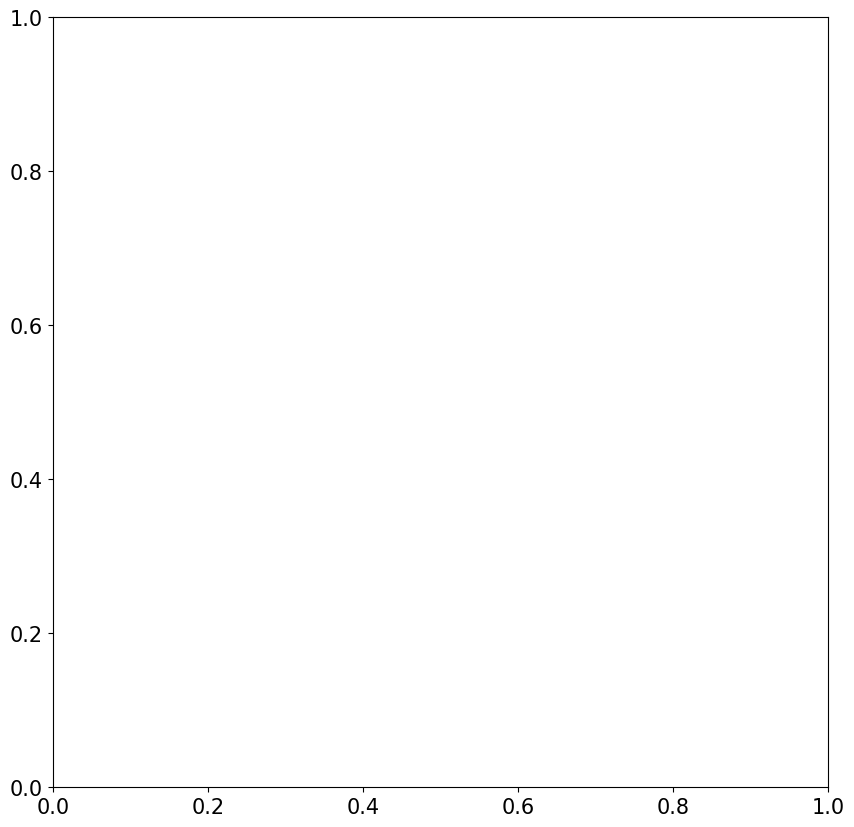

In [36]:
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

# Anova

In [37]:
mutual_fund_data[["Symbol", "Morningstar Category"]]

Symbol Morningstar Category
0   AGTHX         Large Growth
1   FCNTX         Large Growth
2   CWMAX          Large Blend
3   CWMCX          Large Blend
4   CWMEX          Large Blend
..    ...                  ...
95  FDTRX         Large Growth
96  FDYZX         Large Growth
97  BBVLX          Large Value
98  PEYAX          Large Value
99  TWCGX         Large Growth

[100 rows x 2 columns]

In [38]:
mutual_fund_data["Morningstar Category"].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [40]:
mutual_fund_data["Morningstar Category"].value_counts() > 2

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [52]:
fund_type = mutual_fund_data["Morningstar Category"].value_counts() > 2
relevant_fund_type = fund_types[fund_types]
relevant_fund = mutual_fund_data[mutual_fund_data["Morningstar Category"].isin(relevant_fund_types.index)]

relevant_fund_types

Large Growth      True
Large Value       True
Large Blend       True
Mid-Cap Growth    True
Name: Morningstar Category, dtype: bool

In [60]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]
    

In [59]:
fund_type_returns = {}

for key in relevant_fund_type_names.keys():
    
    fund_type_returns[key] = []
    
    for val in relevant_fund_type_names[key]:
        fund_type_returns[key].extend

In [58]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

Large Growth: nan
Large Value: nan
Large Blend: nan
Mid-Cap Growth: nan


C:\Users\adamp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\adamp\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[None, None, None, None]

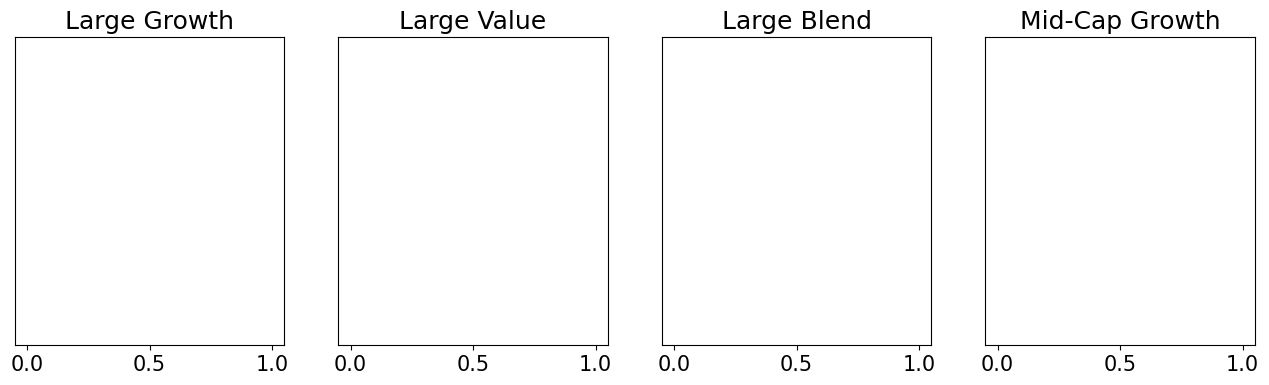

In [61]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns): 
    axs[num].hist(fund_type_returns[key], bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])

In [66]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k -1
    dfwn = N - k
    
    return k, N, dfbn, dfwn


In [67]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 0, 3, -4)

In [70]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)
    
    grand_mean = np.mean(alldata)
    
    for arg in args:
        group_mean = np.mean(arg)
        
        n = len(arg)
        val = n * (group_mean - grand_mean)**2
        
        ssn += val
        
    return ssb

In [71]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

UnboundLocalError: local variable 'ssn' referenced before assignment

In [72]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [73]:
SSW(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

0

In [74]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [75]:
get_sum_square_stats(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

UnboundLocalError: local variable 'ssn' referenced before assignment

In [76]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [77]:
def anova(*args):
    k,N,dfbn,dfwn = get_anova_counts(*args)
    
    ssw,ssb,sst = get_sum_square_stats(*args)
    
    msb = ssb / dfbn
    msw = ssw / dfwn
    
    f = msb / msw
    
    return finish_anova(f,dfbn,dfwn)

In [78]:
anova(fund_type_returns["Large Growth"],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

UnboundLocalError: local variable 'ssn' referenced before assignment

In [79]:
stats.f_oneway(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

C:\Users\adamp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)